In [2]:
#This project provides visual representation for different portfolio variations and visualizes the change of efficient 
#Frontier based on the number of stocks and the price volatility. In this specific example we allow shorrting strategy. 

import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from tqdm import tqdm 
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.optimize as spop
plt.rcParams["figure.figsize"] = (20,10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


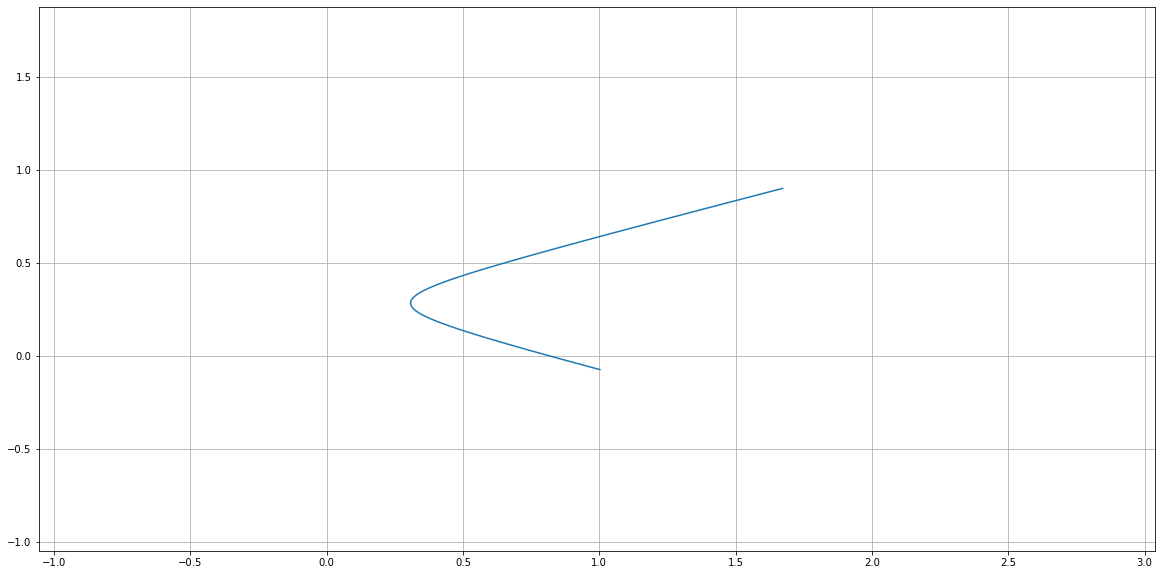

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [105]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC=wa*ErA+wb*ErB

stdC = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
#plt.axis([0.01, 0.035, 0, 0.002])
import matplotlib.pyplot as plt
plt.margins(1, 1)  
plt.plot(stdC,ErC,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

stdC

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


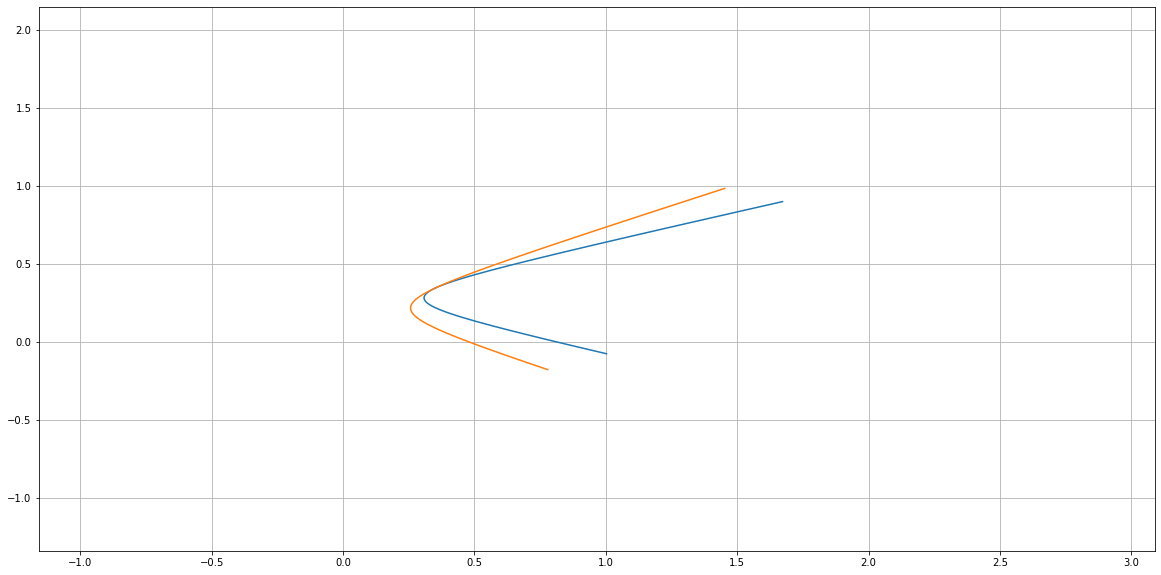

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [108]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC3=wa*ErA+wb*ErB

stdC3 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
#plt.axis([0.01, 0.035, 0, 0.002])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

stdC

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


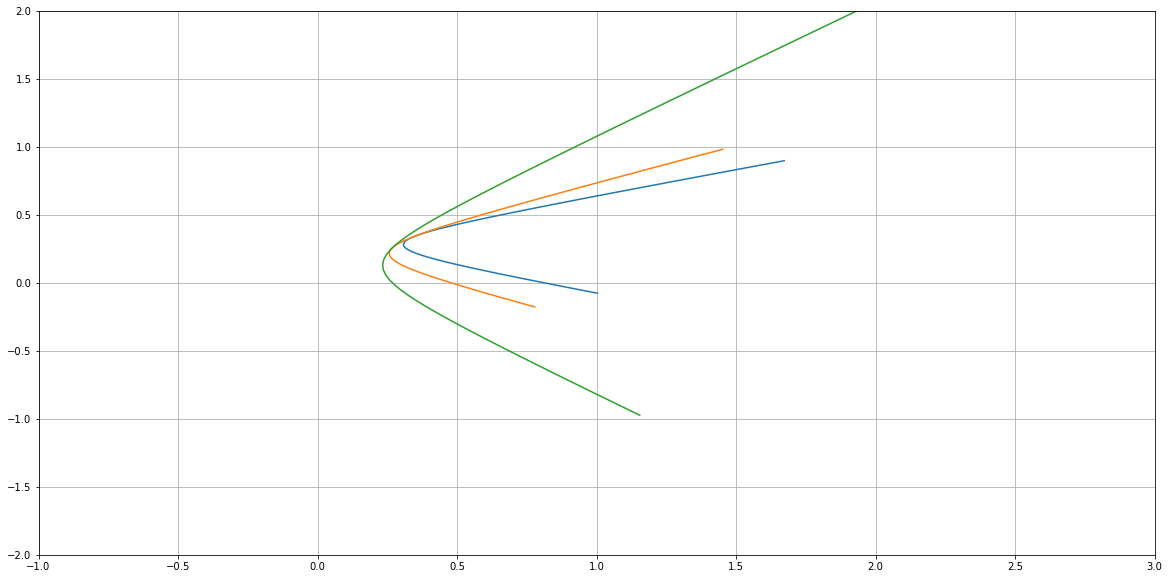

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [115]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC4=wa*ErA+wb*ErB

stdC4 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

stdC

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


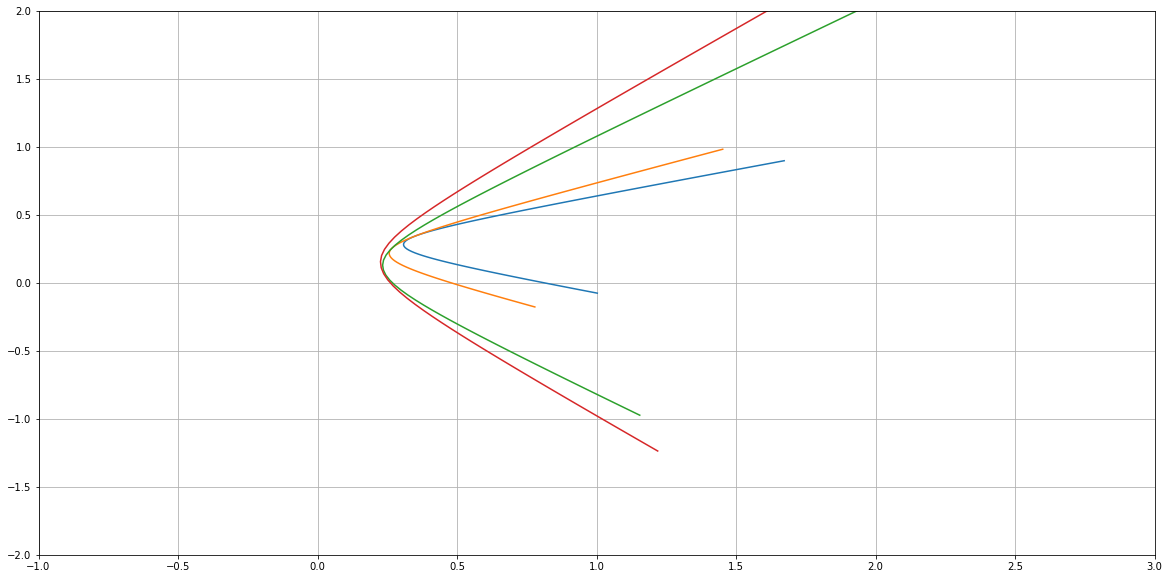

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [119]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC5=wa*ErA+wb*ErB

stdC5 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

stdC

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


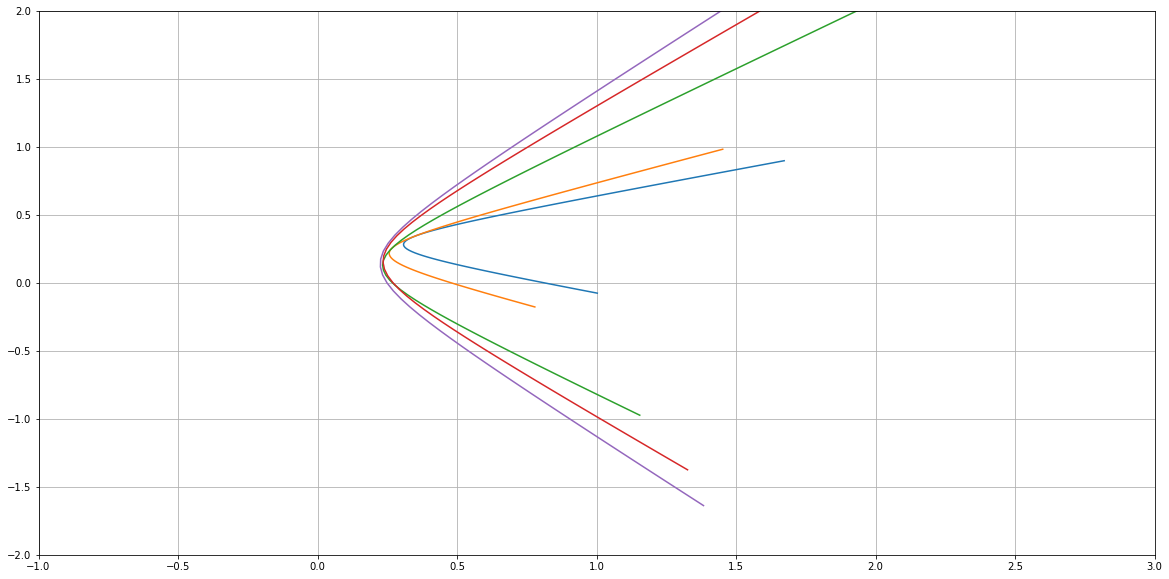

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [122]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC6=wa*ErA+wb*ErB

stdC6 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
plt.plot(stdC6,ErC6,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

stdC

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


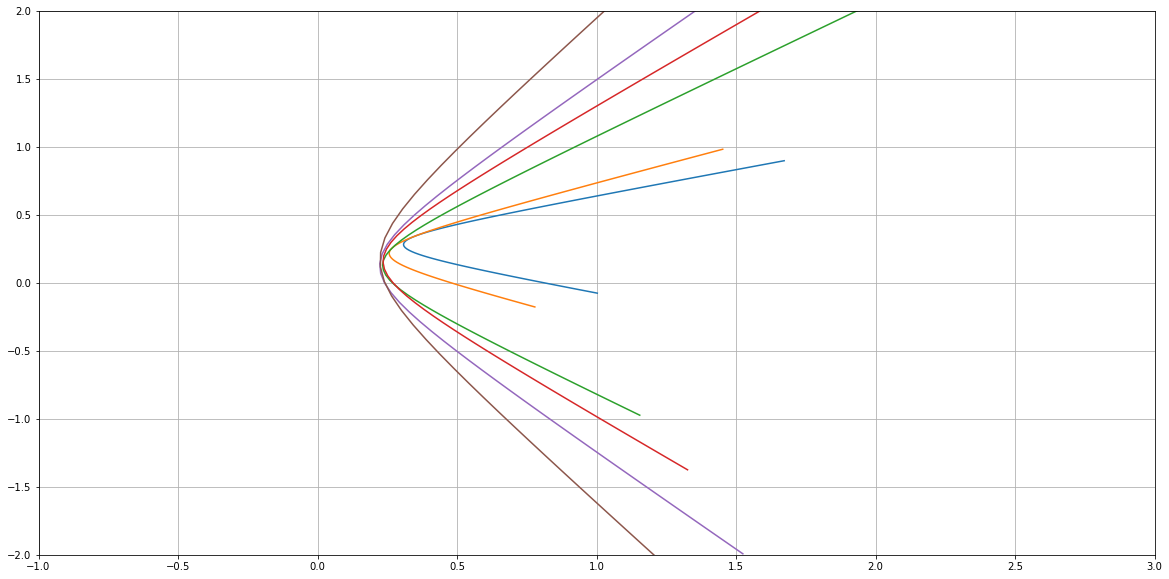

array([1.00257566, 0.97763628, 0.95276685, 0.927973  , 0.90326096,
       0.87863764, 0.85411069, 0.82968868, 0.80538114, 0.78119876,
       0.75715354, 0.73325897, 0.70953026, 0.68598464, 0.66264161,
       0.63952336, 0.61665518, 0.59406594, 0.5717887 , 0.54986139,
       0.52832757, 0.50723737, 0.48664847, 0.46662722, 0.44724987,
       0.42860375, 0.41078845, 0.39391672, 0.37811488, 0.36352248,
       0.3502907 , 0.33857909, 0.32855028, 0.32036232, 0.31415919,
       0.31006004, 0.30814884, 0.30846627, 0.3110055 , 0.31571292,
       0.32249361, 0.33122026, 0.34174383, 0.35390405, 0.36753851,
       0.38248959, 0.39860917, 0.41576135, 0.43382368, 0.45268722,
       0.47225597, 0.49244587, 0.51318361, 0.53440541, 0.55605587,
       0.57808681, 0.60045636, 0.62312806, 0.64607009, 0.66925466,
       0.6926574 , 0.71625695, 0.74003446, 0.76397332, 0.78805883,
       0.81227794, 0.83661905, 0.86107181, 0.88562698, 0.91027627,
       0.93501223, 0.95982816, 0.98471802, 1.00967635, 1.03469

In [125]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F", "TXMD"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC7=wa*ErA+wb*ErB

stdC7 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
plt.plot(stdC6,ErC6,scaley=True)
plt.plot(stdC7,ErC7,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


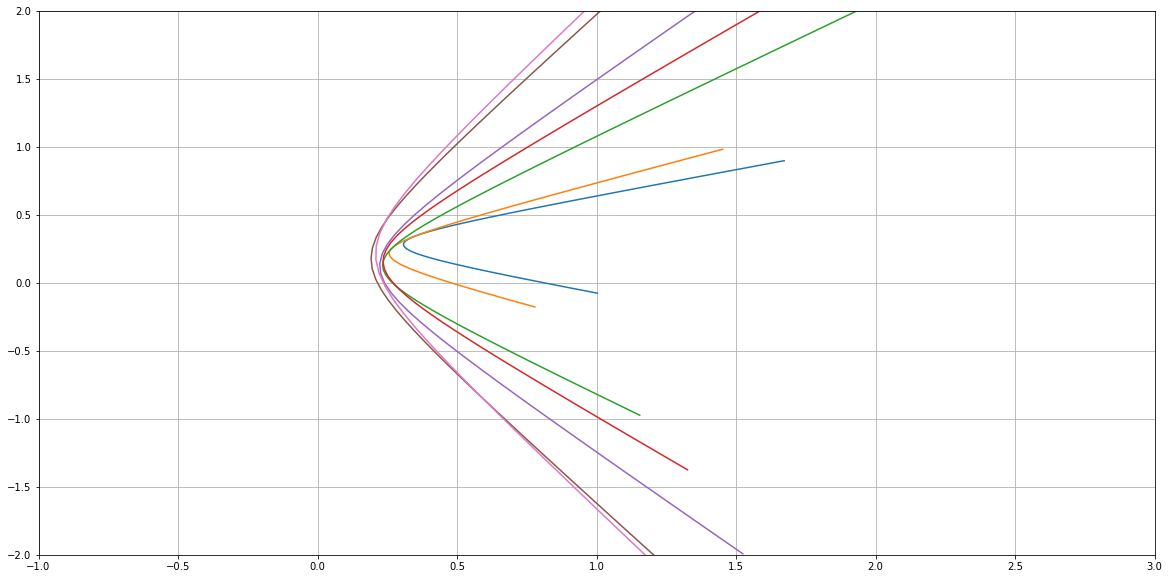

In [130]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F", "TXMD", "ABBV"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC8=wa*ErA+wb*ErB

stdC8 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
plt.plot(stdC6,ErC6,scaley=True)
plt.plot(stdC7,ErC7,scaley=True)
plt.plot(stdC8,ErC8,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


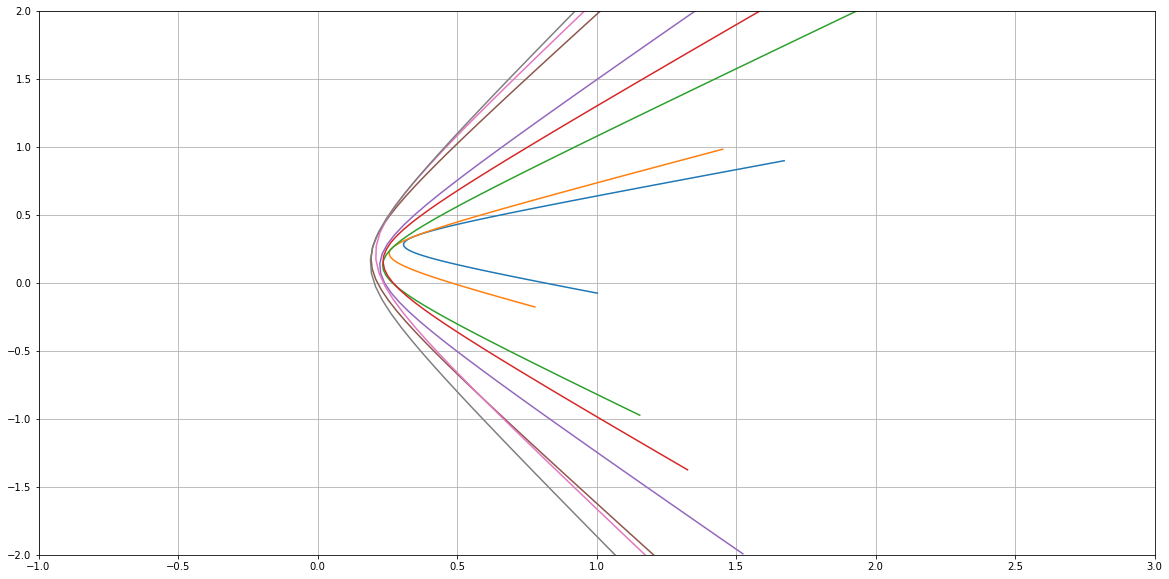

In [132]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F", "TXMD", "ABBV","GOLD"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC9=wa*ErA+wb*ErB

stdC9 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([-1, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
plt.plot(stdC6,ErC6,scaley=True)
plt.plot(stdC7,ErC7,scaley=True)
plt.plot(stdC8,ErC8,scaley=True)
plt.plot(stdC9,ErC9,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


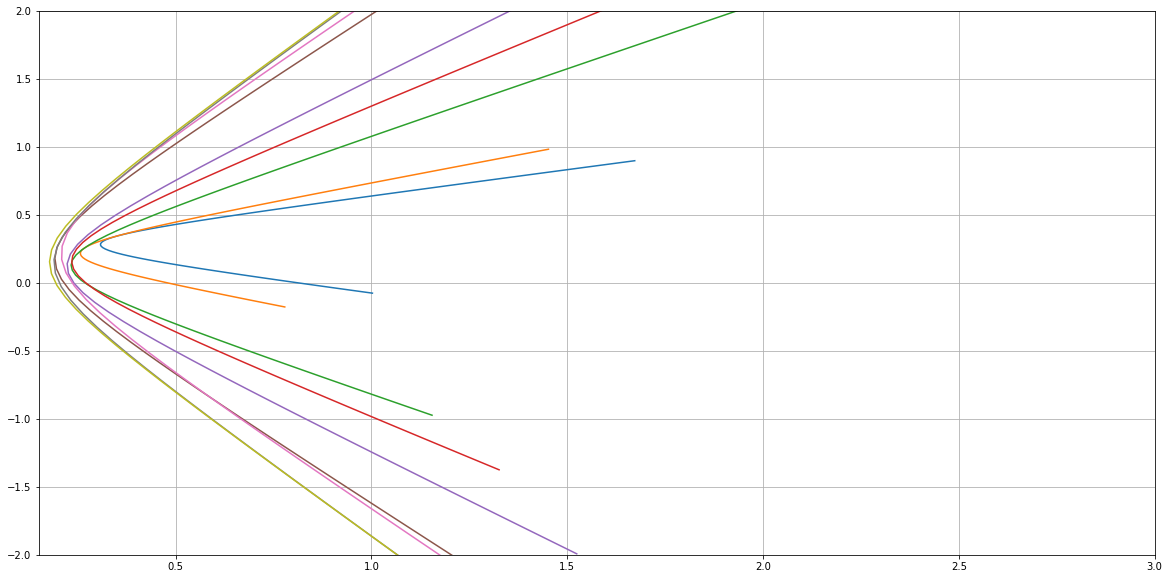

In [142]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F", "TXMD", "ABBV","GOLD", "VNQ"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = std**2

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC10=wa*ErA+wb*ErB

stdC10 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([0.15, 3, -2, 2])
import matplotlib.pyplot as plt
plt.margins(1, 1)
plt.plot(stdC,ErC,scaley=True)
plt.plot(stdC3,ErC3,scaley=True)
plt.plot(stdC4,ErC4,scaley=True)
plt.plot(stdC5,ErC5,scaley=True)
plt.plot(stdC6,ErC6,scaley=True)
plt.plot(stdC7,ErC7,scaley=True)
plt.plot(stdC8,ErC8,scaley=True)
plt.plot(stdC9,ErC9,scaley=True)
plt.plot(stdC10,ErC10,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


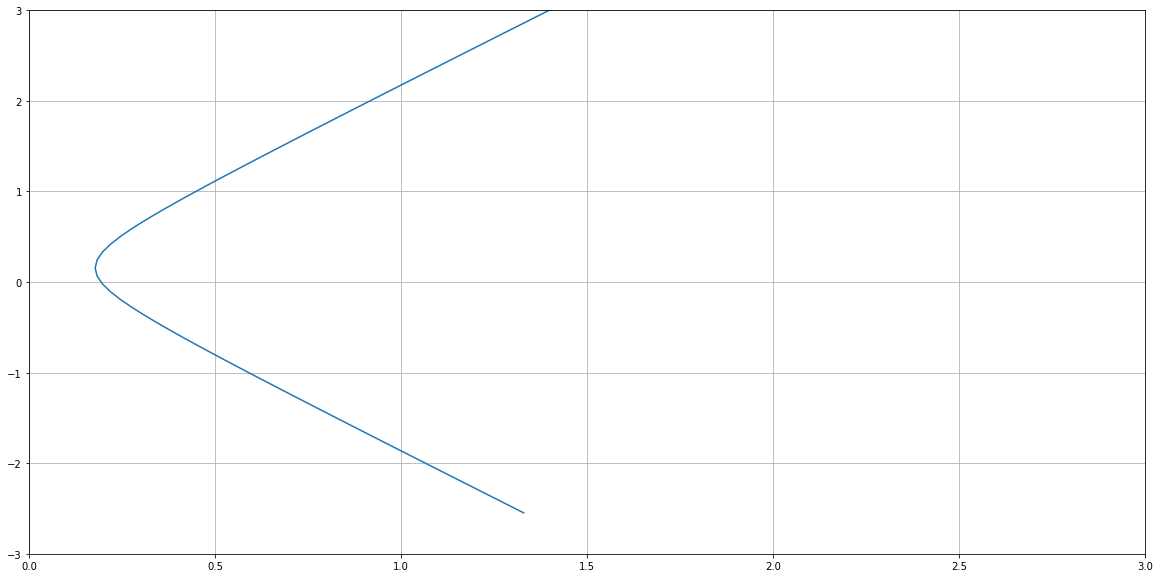

In [35]:
# In this part I am running the same code for efficient frontier with different weights


tickers = ["AAPL","SNAP", "DOV", "IBM","BTC-USD", "F", "TXMD", "ABBV","GOLD", "VNQ"]
new_list =[]

#here we just get the tickers
for x in range(len(tickers)):
    new_list.append(yf.download(tickers[x], start= datetime(2017,5,1), end = datetime(2022,5,1),intervals='1d')["Adj Close"])
df=pd.DataFrame(new_list, index=tickers).transpose()
df = np.log(df).diff()

#Let's call Earnings Er and Standard Deviation std
Er = np.array(df.describe().loc['mean'])*252
std = np.array(df.describe().loc['std'])

var = (std**2)

df.dropna(inplace=True)

varcovar1=df.cov()*252
#Efficient Portfolio A

#Let's Consider scenario when short is not allowed. To adjust for this scenario we can fix the constraints c1 and c2 
#for values that will make the short part of the graph to dissappear. 

c1=0.006
weightA=np.linalg.inv(varcovar1) @(Er - c1)/np.sum(np.linalg.inv(varcovar1) @(Er - c1))
ErA = weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

c2=0.4
weightB=np.linalg.inv(varcovar1) @(Er - c2)/np.sum(np.linalg.inv(varcovar1) @(Er - c2))
ErB = weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

covAB=weightA@varcovar1@weightB.T

wa=np.linspace(-1.5,4.5,num=100)
wb = 1-wa

ErC10=wa*ErA+wb*ErB

stdC10 = np.sqrt((wa*stdA)**2+(wb*stdB)**2+2*wa*wb*covAB)
plt.axis([0, 3, -3, 3])
plt.margins(1, 1)
plt.plot(stdC10,ErC10,scaley=True)
#plt.scatter(stdA,ErA)
plt.grid()
plt.show()

[*********************100%***********************]  10 of 10 completed


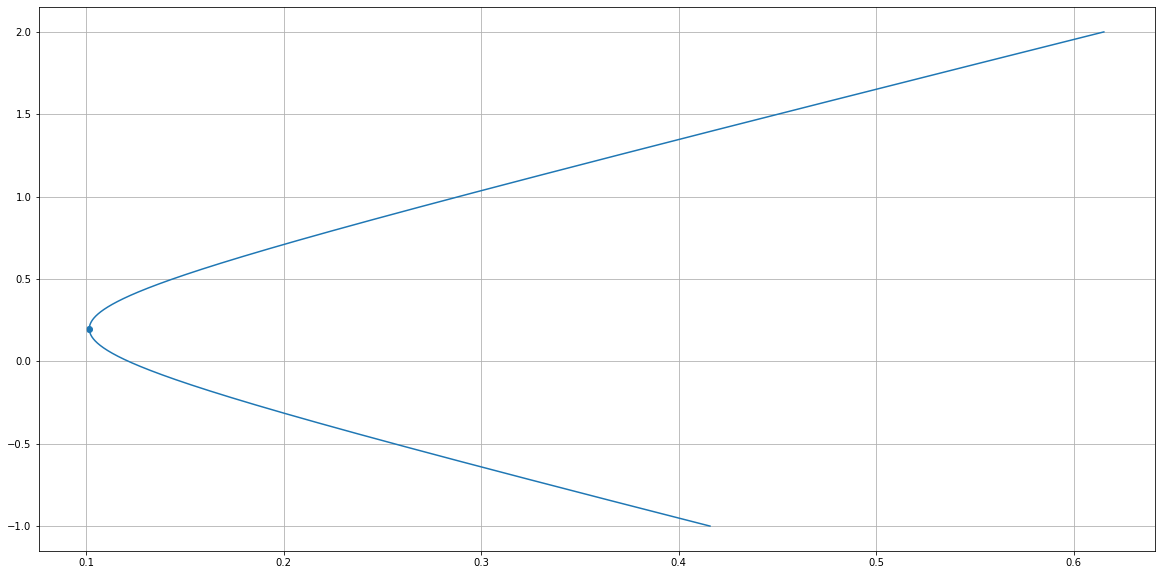

In [30]:
tickers = ["AAPL","SNAP", "DOV","IBM","BTC-USD", "F", "TXMD", "ABBV","GOLD", "VNQ"]
start = '2020-12-31'
end = '2021-12-31'
prices_df = yf.download(' '.join(tickers), start, end)['Adj Close']
returns_df = prices_df.pct_change()[1:]

#calculating the return vector and the covariance matrix
cov = returns_df.cov()*252
r = np.array(((1+returns_df).prod())**(252/len(returns_df)) - 1)
e = np.ones(len(r))

#defining the investable universe
icov = np.linalg.inv(cov)
h = np.matmul(e, icov)
g = np.matmul(r, icov)
a = np.sum(e*h)
b = np.sum(e*g)
c = np.sum(r*g)
d = a*c - b**2

#minimum variance 
mvp = h/a
mvp_return = b/a
mvp_risk = 1/a**(1/2)

#plotting the efficient portfolio frontier
exp_returns = np.arange(-1, 2.001, 0.001)
risk = ((a*exp_returns**2 - 2*b*exp_returns + c)/d)**(1/2)
plt.scatter(mvp_risk, mvp_return)
plt.plot(risk, exp_returns)
plt.grid()

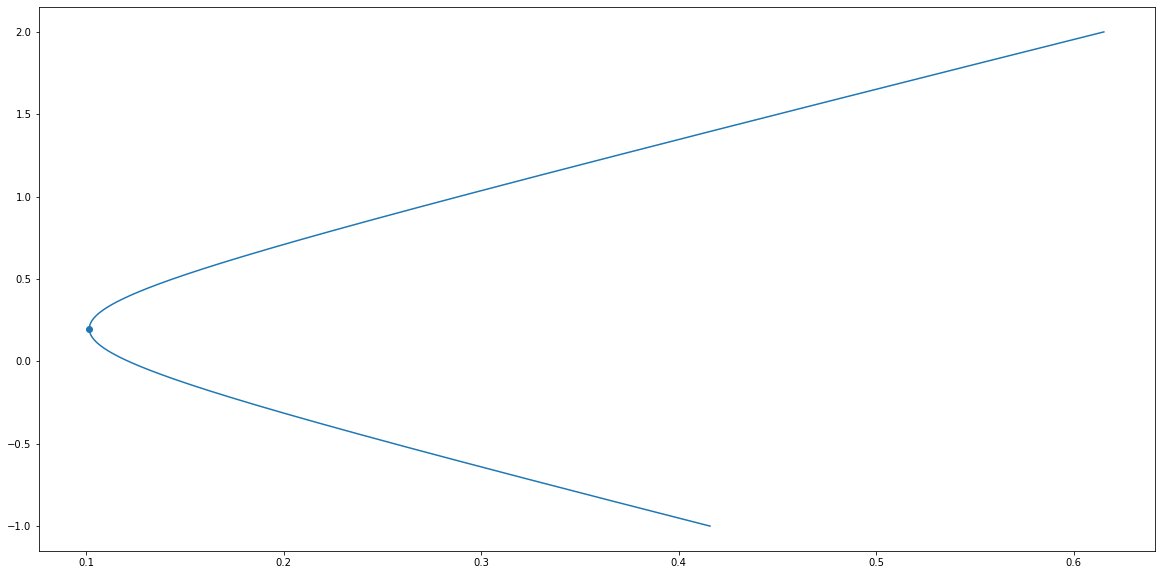

In [25]:
#solving the target return problem
target_return = 0.10
Risk_Free_Rate =0.02
if target_return + Risk_Free_Rate < mvp_return:
    optimal_portfolio = mvp
    optimal_return = mvp_return
    optimal_risk = mvp_risk
else:
    l = (c - b*target_return)/d
    m = (a*target_return - b)/d
    optimal_portfolio = l*h + m*g
    optimal_return = np.sum(optimal_portfolio*r)
    optimal_risk = ((a*optimal_return**2 - 2*b*optimal_return + c)/d)**(1/2)
plt.plot(risk, exp_returns)
plt.scatter(optimal_risk, optimal_return)

In [24]:
optimal_portfolio

array([ 0.07554972,  0.21847548, -0.00521042,  0.02848267,  0.00709058,
        0.08884283,  0.13797405, -0.01039741,  0.00820097,  0.45099153])

[0.94149467 1.02872719 1.1159597  1.20319221 1.29042472 1.37765724
 1.46488975 1.55212226 1.63935477 1.72658729 1.8138198  1.90105231
 1.98828483 2.07551734 2.16274985 2.24998236 2.33721488]
[0.42293113 0.46186492 0.50138494 0.5413628  0.58170413 0.62233824
 0.66321132 0.70428177 0.74551697 0.78689102 0.82838311 0.86997635
 0.9116569  0.95341332 0.99523604 1.03711705 1.07904957]


array([0.02      , 0.91842566, 2.31220482])